Epoch 1/100


c:\Users\pepeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 392821.5625 - val_loss: 371501.6875
Epoch 2/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 365139.7188 - val_loss: 347041.6562
Epoch 3/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 341075.4062 - val_loss: 323754.9375
Epoch 4/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 317864.5000 - val_loss: 300837.4375
Epoch 5/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 295321.2188 - val_loss: 277897.8438
Epoch 6/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 272486.6875 - val_loss: 256462.7656
Epoch 7/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 251207.9375 - val_loss: 236037.0312
Epoch 8/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 231244.1719 - val_loss: 216544.5312
Epoch 9/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 212168.0312 - val_loss: 197952.3750
Epoch 10/100
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 193764.7344 - val_loss: 180251.6875
Epoch 11/100
900/900 ━━━━━━━━━━━━━━━━━━━━

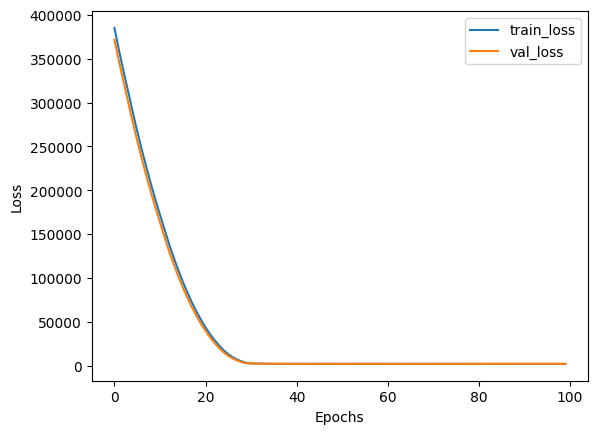

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('C:/Users/pepeb/Documents/EDEM_IA_MASTER/EDEM_IA_PROJECT_2/dataset.csv')

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Convertir las variables categóricas a numéricas usando one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Separar las características (features) y la variable objetivo (target)
X = df.drop(columns=['credit_score'])
y = df['credit_score']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Graficar el historial de entrenamiento
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

In [14]:

from sklearn.metrics import mean_absolute_error, r2_score
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar el MAE y R^2
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

# Mostrar algunas predicciones junto con los valores reales
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(predictions.head(10))

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error: 37.85295486450195
R^2 Score: 0.1086035966873169
       Actual   Predicted
44885     614  613.984070
10988     623  649.715210
26912     663  651.021362
7473      567  639.672974
32767     608  615.728943
7972      641  599.769287
28939     637  617.073547
43852     576  651.159119
15623     687  632.970093
13750     616  632.313110


In [17]:
# Función para hacer predicciones con entrada manual
def predict_credit_score(model, scaler, input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return prediction[0][0]

# Ejemplo de entrada manual
sample_data = {
    "person_age": 70,  
    "person_gender": "male",  # Opciones: 'female', 'male'
    "person_education": "Master",  # Opciones: 'Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'
    "person_income": 4000,  
    "person_emp_exp": 15,  
    "person_home_ownership": "OTHER",  # Opciones: 'RENT', 'OWN', 'MORTGAGE', 'OTHER'
    "loan_amnt": 10000,  
    "loan_intent": "VENTURE",  # Opciones: 'PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'
    "loan_int_rate": 6.0,  
    "loan_percent_income": 10000 /4000,  # Relación préstamo/ingreso
    "cb_person_cred_hist_length": 1,  
    "previous_loan_defaults_on_file": "Yes"  # Opciones: 'No', 'Yes'
}


# Hacer una predicción con la entrada manual
predicted_credit_score = predict_credit_score(model, scaler, sample_data)
print(f'Predicted Credit Score: {predicted_credit_score}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Credit Score: 642.6383666992188
